1) Execute and save the given model and use the saved model to predict on new text data (ex, “A lot of good things are happening. We are respected again throughout the world, and that's a great thing .@realDonaldTrump”)

In [ ]:
!pip install tensorflow
!pip install keras

Class Distribution in Dataset:
sentiment
Negative    8493
Neutral     3142
Positive    2236
Name: count, dtype: int64


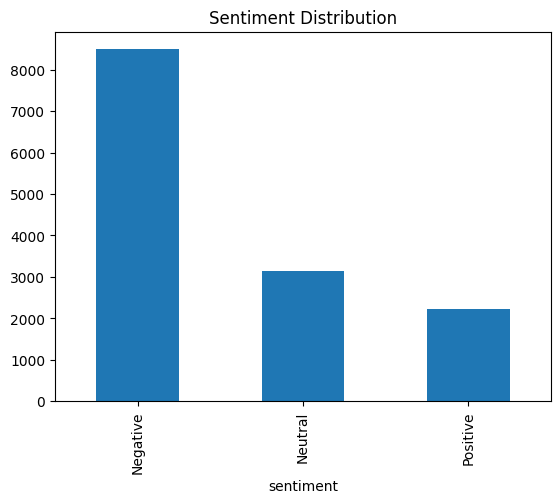

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


291/291 - 43s - 147ms/step - accuracy: 0.6433 - loss: 0.8324
Epoch 2/5
291/291 - 40s - 136ms/step - accuracy: 0.7019 - loss: 0.6947
Epoch 3/5
291/291 - 41s - 143ms/step - accuracy: 0.7372 - loss: 0.6244
Epoch 4/5
291/291 - 39s - 135ms/step - accuracy: 0.7598 - loss: 0.5726
Epoch 5/5
291/291 - 40s - 138ms/step - accuracy: 0.7766 - loss: 0.5335


144/144 - 3s - 23ms/step - accuracy: 0.6627 - loss: 0.8120


Loss: 0.8119679093360901
Accuracy: 0.6627348065376282
Metrics: ['loss', 'compile_metrics']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
Softmax probabilities: [[0.17898925 0.05979644 0.7612144 ]]
Predicted sentiment: Positive


In [ ]:
# !pip install tensorflow

import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/Data (1).csv')
data = data[['text', 'sentiment']]

# Basic text cleaning
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))  # Clean special characters
data['text'] = data['text'].apply(lambda x: re.sub(r'\brt\b', '', x))  # Clean "rt" mentions

# Tokenization
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

# Encode labels
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(data['sentiment'])
y = to_categorical(integer_encoded)

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model creation
embed_dim = 128
lstm_out = 196

def createmodel():
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Check class distribution in the dataset
print("Class Distribution in Dataset:")
print(data['sentiment'].value_counts())

# Plot class distribution
data['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()

# Train and save model
batch_size = 32
model = createmodel()
model.fit(X_train, Y_train, epochs=5, batch_size=batch_size, verbose=2)  # Train for more epochs
model.save('sentiment_model.h5')

# Evaluate the model
score, acc = model.evaluate(X_test, Y_test, verbose=2, batch_size=batch_size)
print("Loss:", score)
print("Accuracy:", acc)
print("Metrics:", model.metrics_names)

# Load the model
model = load_model('sentiment_model.h5')

# Predict on new text
def preprocess(texts):
    texts = [re.sub(r'[^a-zA-Z0-9\s]', '', t.lower()) for t in texts]
    texts = [re.sub(r'\brt\b', '', t) for t in texts]
    sequences = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(sequences, maxlen=X.shape[1])
    return padded

new_text = ["A lot of good things are happening. We are respected again throughout the world, and that's a great thing .@realDonaldTrump"]

processed_text = preprocess(new_text)

# Predict and print softmax probabilities
prediction = model.predict(processed_text)
print("Softmax probabilities:", prediction)

# Convert prediction to label
predicted_class = labelencoder.inverse_transform([prediction.argmax(axis=1)[0]])
print("Predicted sentiment:", predicted_class[0])


2) Apply GridSearchCV on the source code provided and produce the results with the best combination.

In [ ]:
!pip install --upgrade scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
import pandas as pd
import re
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load data
data = pd.read_csv('/content/Data (1).csv')
data = data[['text', 'sentiment']]
data['text'] = data['text'].astype(str).apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))
data['text'] = data['text'].apply(lambda x: x.replace('rt', ' '))

# Tokenize
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

# Encode labels
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(data['sentiment'])
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Hyperparameter grid
embed_dims = [64, 128]
lstm_outs = [64, 128]
batch_sizes = [32]
epochs_list = [1, 2]

# Store best result
best_acc = 0
best_params = {}

for embed_dim in embed_dims:
    for lstm_out in lstm_outs:
        for batch_size in batch_sizes:
            for epochs in epochs_list:
                print(f"Training with embed_dim={embed_dim}, lstm_out={lstm_out}, batch_size={batch_size}, epochs={epochs}")

                model = Sequential()
                model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
                model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
                model.add(Dense(3, activation='softmax'))
                model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                y_pred = model.predict(X_test)
                acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

                print(f"Accuracy: {acc:.4f}")

                if acc > best_acc:
                    best_acc = acc
                    best_params = {
                        'embed_dim': embed_dim,
                        'lstm_out': lstm_out,
                        'batch_size': batch_size,
                        'epochs': epochs
                    }

print("\n Best Accuracy: {:.2f}%".format(best_acc * 100))
print("Best Hyperparameters:", best_params)


Training with embed_dim=64, lstm_out=64, batch_size=32, epochs=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Accuracy: 0.6564
Training with embed_dim=64, lstm_out=64, batch_size=32, epochs=2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Accuracy: 0.6820
Training with embed_dim=64, lstm_out=128, batch_size=32, epochs=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Accuracy: 0.6610
Training with embed_dim=64, lstm_out=128, batch_size=32, epochs=2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Accuracy: 0.6839
Training with embed_dim=128, lstm_out=64, batch_size=32, epochs=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Accuracy: 0.6608
Training with embed_dim=128, lstm_out=64, batch_size=32, epochs=2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Accuracy: 0.6728
Training with embed_dim=128, lstm_out=128, batch_size=32, epochs=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step
Accuracy: 0.6743
Training with embed_dim=128, lstm_out=128, batch_size=32, epochs=2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
Accuracy: 0.6776

 Best Accuracy: 68.39%
Best Hyperparameters: {'embed_dim': 64, 'lstm_out': 128, 'batch_size': 32, 'epochs': 2}
